<a href="https://colab.research.google.com/github/chgong2004/Cayenne-Base-/blob/main/Charlize_Gong_Research_Question_2_CodeBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # 2 : Include question here: Is there an association between level of highest education and age of first alcohol drink? 

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1

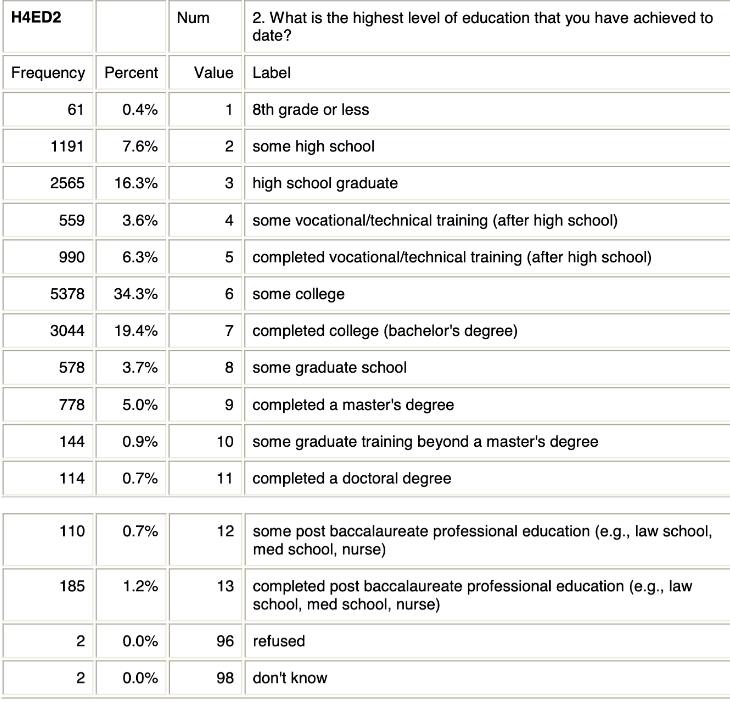

In [ ]:
#Manage data for variable 1
df['H4ED2'].value_counts()

6     1702
      1390
7     1012
3      835
2      383
5      327
9      256
8      199
4      182
13      72
10      59
12      39
11      31
1       16
98       1
Name: H4ED2, dtype: int64

In [ ]:
df['level_edu'] = df['H4ED2']
df['level_edu'] = df['level_edu'].loc[df['level_edu'] != ' ']
df['level_edu'] = df['level_edu'].loc[df['level_edu'] != '98']
df['level_edu'].value_counts()

6     1702
7     1012
3      835
2      383
5      327
9      256
8      199
4      182
13      72
10      59
12      39
11      31
1       16
Name: level_edu, dtype: int64

In [ ]:
df['level_edu'].replace(['1','2','3','4','5','6','7','8','9','10','11','12','13'],['No High School Diploma','No High School Diploma','High_School_Diploma','High_School_Diploma','High_School_Diploma','High_School_Diploma','College_Degree','College_Degree','Graduate Degree','Graduate Degree','Graduate Degree','Graduate Degree','Graduate Degree'],inplace = True)
df['level_edu'].value_counts()

High_School_Diploma       3046
College_Degree            1211
Graduate Degree            457
No High School Diploma     399
Name: level_edu, dtype: int64

In [ ]:
rp.summary_cat(df['level_edu'])

,Variable,Outcome,Count,Percent
0,level_edu,High_School_Diploma,3046,59.57
1,,College_Degree,1211,23.68
2,,Graduate Degree,457,8.94
3,,No High School Diploma,399,7.80


In [ ]:
#Graphs and tables or statistics

<Axes: title={'center': 'What is the highest level of education that you have achieved to date?'}, ylabel='level_edu'>

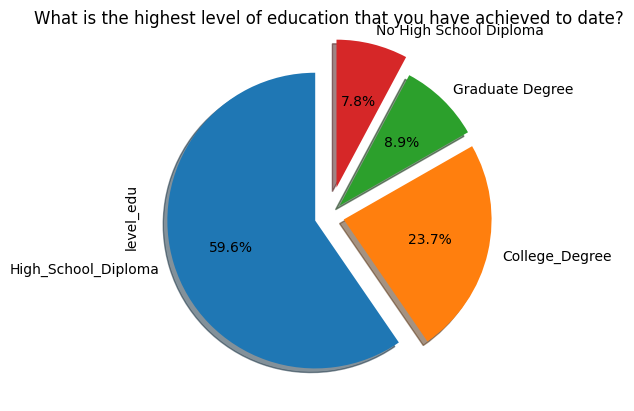

In [ ]:
plt.title("What is the highest level of education that you have achieved to date?")
explode = (0.1, 0.1, 0.1, 0.2)
df['level_edu'].value_counts().plot(kind= 'pie', autopct='%1.1f%%',  explode=explode, shadow=True, startangle=90)

Text(0, 0.5, 'Percent')

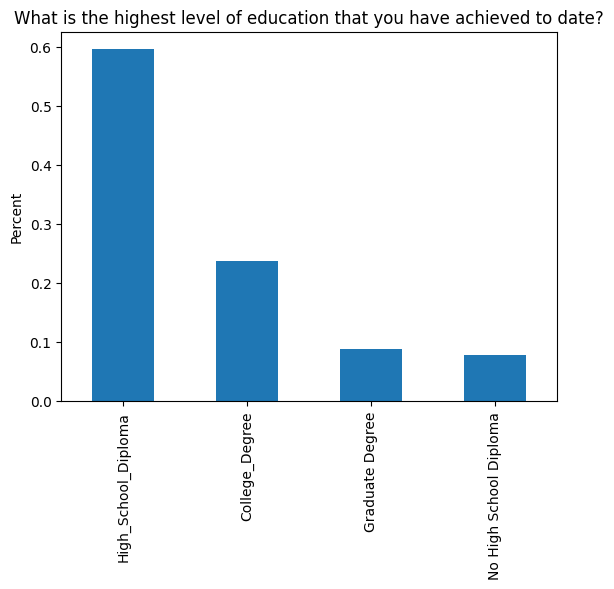

In [ ]:
df['level_edu'].value_counts(normalize = True).plot(kind ='bar')
plt.title("What is the highest level of education that you have achieved to date?")
plt.ylabel("Percent")

Codebook 2:

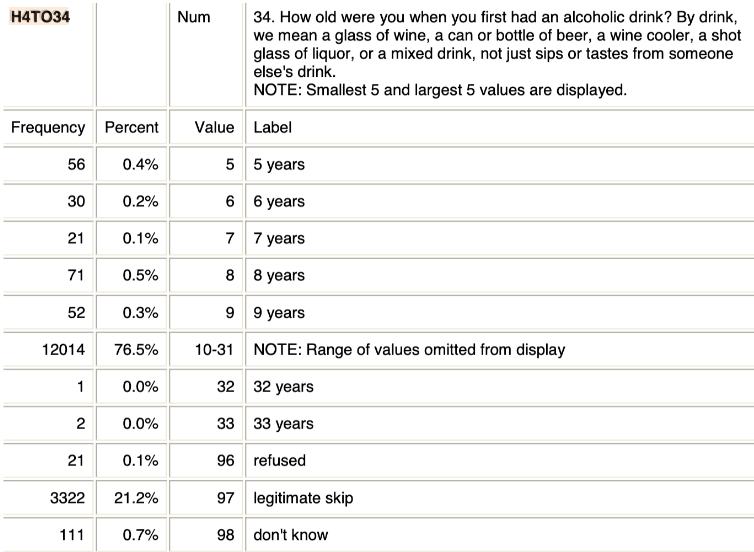

In [ ]:
#Manage data for variable 2
df['H4TO34'].dtype

dtype('O')

In [ ]:
df['age_drink'] = df['H4TO34']
df['age_drink'].dtype

dtype('O')

In [ ]:
df['age_drink'] = pd.to_numeric( df['age_drink'] , errors='coerce' )
df['age_drink'].dtype

dtype('float64')

In [ ]:
df['age_drink'] = df['age_drink'].loc[ df['age_drink'] != ' ' ]
df['age_drink'] = df['age_drink'].loc[ df['age_drink'] < 96 ]


In [ ]:
df['age_drink'].describe()

count    4038.000000
mean       16.452452
std         3.162997
min         5.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        33.000000
Name: age_drink, dtype: float64

In [ ]:
rp.summary_cont(df['age_drink'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age_drink,4038.0,16.4525,3.163,0.0498,16.3549,16.55


In [ ]:
rp.summarize(df['age_drink'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,age_drink,4038,16.4525,16.0,10.0046,3.163,0.0498,"[16.3549, 16.55]"


In [ ]:
#Graphs and tables or statistics

Text(0.5, 0, 'Age of First Drink')

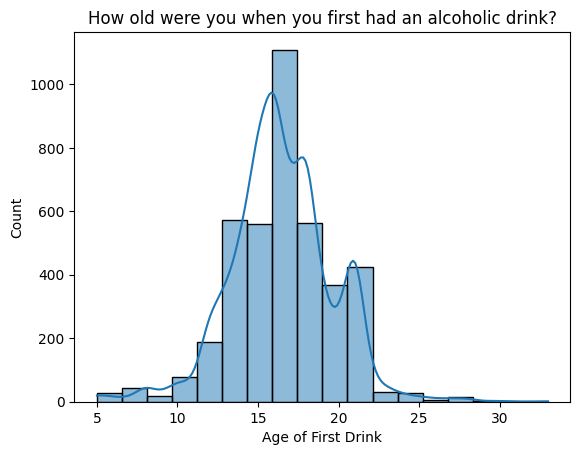

In [ ]:
sns.histplot(x ='age_drink', data = df, bins =18, kde=True)
plt.title("How old were you when you first had an alcoholic drink?")
plt.ylabel("Count")
plt.xlabel("Age of First Drink")

Text(0.5, 1.0, 'How old were you when you first had an alcoholic drink?')

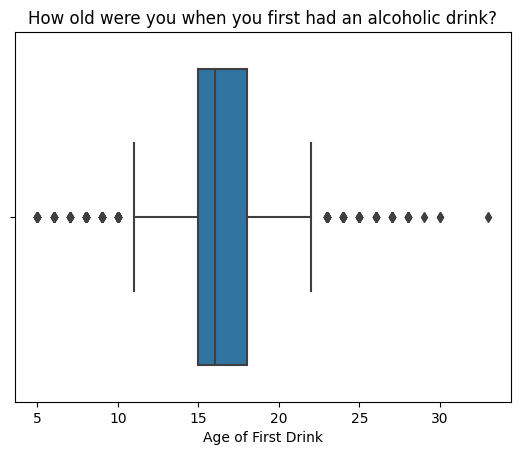

In [ ]:
sns.boxplot(x = 'age_drink', data =df)
plt.xlabel("Age of First Drink")
plt.title("How old were you when you first had an alcoholic drink?")